## Step 1：Corpus Loading & Corpus Processing：

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
df = pd.read_csv("product_lemmatized_48962.csv")

In [3]:
df.head()

,product_id,product_name,product_info,text
0,1,Chocolate Sandwich Cookies,One box with 18 snack packs 2 cookies per pack...,one box with 18 snack pack 2 cooky per pack of...
1,2,All-Seasons Salt,Flavorful alternative to table salt Great for ...,flavorful alternative to table salt great for ...
2,3,Robust Golden Unsweetened Oolong Tea,These Lipton Iced Tea bags let you easily brew...,these lipton iced tea bag let you easily brew ...
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,One 9 oz box of Smart Ones Three Cheese Ziti W...,one 9 oz box of smart one three cheese ziti wi...
4,5,Green Chile Anytime Sauce,Packed in USA Packed in USA Classic pasta sauc...,packed in usa packed in usa classic pasta sauc...


In [4]:
# 讀取停用字詞典
with open("stop_words.txt",'r',encoding='utf-8')as file:
    stop_words = file.read().split('\n')

## Step 2：Document-Term Matrix

In [5]:
docs=df['text'].values.astype('U').tolist()
cv=CountVectorizer(max_df=0.85,stop_words=stop_words, max_features=10000, min_df=100)
word_count_vector=cv.fit_transform(docs)

In [6]:
word_count_vector.shape

(48962, 5818)

In [7]:
# 獲得各商品的tfidf向量
transformer = TfidfTransformer()

tfidf = transformer.fit_transform(word_count_vector)
weight = tfidf.toarray()

final_df = pd.DataFrame(data = weight, columns = cv.get_feature_names())

In [8]:
# first 10 words with highest weight on document 0:
final_df.T.nlargest(10, 0)

,0,1,2,3,4,5,6,7,8,9,...,48952,48953,48954,48955,48956,48957,48958,48959,48960,48961
cooky,0.617613,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.380142,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
chocolate,0.339904,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.363367,0.000000,0.0,0.0,0.000000,0.0,0.085903,0.000000,0.0,0.0
dunkable,0.321552,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
sandwich,0.295064,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.025142,0.0,0.0,0.000000,0.0,0.139821,0.084843,0.0,0.0
creme,0.252467,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
wafer,0.185393,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.210201,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
cookie,0.167891,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.022250,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
snack,0.156940,0.04349,0.0,0.0,0.0,0.0,0.0,0.0,0.034732,0.0,...,0.120411,0.000000,0.0,0.0,0.070086,0.0,0.093939,0.000000,0.0,0.0
supremely,0.147881,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
double,0.096712,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0


## Step 3：K-Means

***Function that runs the K-Means algorithm max_k times and returns a dictionary of each k result***

In [9]:
# Data Structures
import numpy  as np

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [10]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(4, max_k):
        kmeans = cluster.KMeans(n_clusters = k,
                                init = 'k-means++',
                                n_init = 10,
                                tol = 0.0001,
                                n_jobs = -1,
                                random_state = 1,
                                algorithm = 'full'
                               )
        kmeans_results.update({k : kmeans.fit(data)})
        
    return kmeans_results

**Silhouette Score**

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [11]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [12]:
# Running Kmeans
k = 4
kmeans_results = run_KMeans(k, final_df)

/usr/local/anaconda3/envs/diamond_proj/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


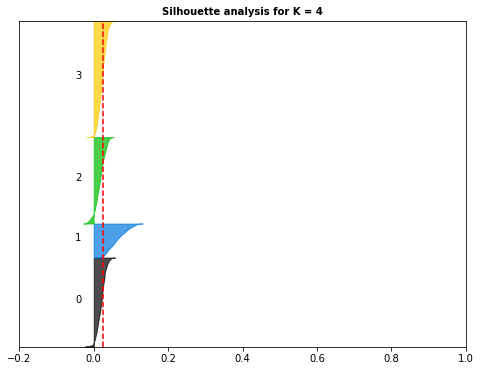

In [13]:
# Plotting Silhouette Analysis
silhouette(kmeans_results, final_df, plot=True)

## Step 4：Map of Words

In [14]:
best_result = 4
kmeans = kmeans_results.get(best_result)
print(type(kmeans))

<class 'sklearn.cluster._kmeans.KMeans'>


In [15]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.savefig('cluster_{}.png'.format(i)) 
        plt.show()

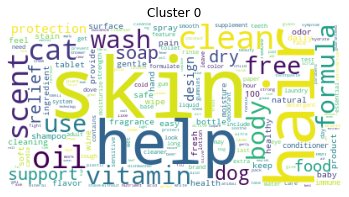

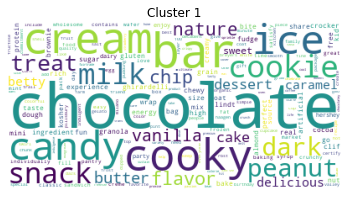

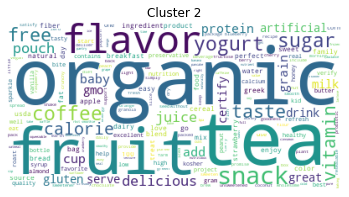

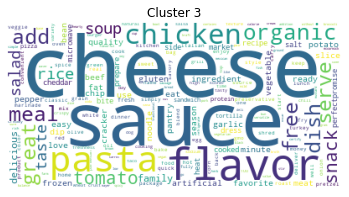

In [16]:
centroids = pd.DataFrame(kmeans.cluster_centers_) # cluster_centers_:（n_clusters, n_features）
centroids.columns = final_df.columns
generateWordClouds(centroids)

## Step 5：Save the Model

In [27]:
import pickle

with open('kmeans31.pickle', 'wb') as f:
    pickle.dump(kmeans, f)

In [30]:
with open('kmeans31.pickle', 'rb') as f:
    model = pickle.load(f)